# Point Source in Layered Diffusive Media

This example is meant to illustrate the use of Diffusion Theory techniques for neutron diffusion in multiple layers of non-multiplying media.  

A point source is placed at the origin surrounded by a sphere of difusing, non-multiplying material.  Outside of the sphere is a second (in general, dissimilar) material that extends to infinity.  An analytic solution to the Diffusion Equation is found.  A model of the same arrangement is created for use with OpenMC.  Tallies are collected of the simulation and the results are compared with diffusion theory.

## Analytic Results

To get an analytic solution, the diffusion equation must be solved in both region A and region B.  

$$ \nabla^2 \phi - \frac{1}{L^2}\phi = 0$$

Since we have a point source and the boundary between region A and region B is a sphere, we will use spherical coordinates.  We will assume spherical symmetry and the resulting ordinary differential equation has the following solutions:

$$ \phi_A (r) = \frac{C_1}{r}e^{\frac{r}{L_A}} + \frac{C_2}{r}e^{\frac{-r}{L_A}} $$

$$ \phi_B (r) = \frac{C_3}{r}e^{\frac{-r}{L_B}} + \frac{C_4}{r}e^{\frac{r}{L_B}}$$

### Boundary Conditions

#### Source Condition as $r \to 0$
In region A we apply the condition that $ 4\pi \lim_{r \to 0} r^2 J(r) = S.$  For region A this reads:
$$ 4 \pi \lim_{r \to 0} r^2 J(r) = 4 \pi \lim_{r \to 0} -D_A r^2 \frac{d}{dr} \phi_A(r)$$
which gives the condition:
$$ 4 \pi D_A (C_1 + C_2) = S$$

#### 'Finiteness' Condition as $r \to \infty$
Since region B extends to infinity, $C_4 = 0$ so that $\phi_B$ remains finite.

#### Continuity of flux at $r = a$
We require that $\phi_A(r = a) = \phi_B(r = a)$ for continuity.  This reads:
$$ \phi_A(a) = \frac{C_1}{a}e^{\frac{a}{L_A}} + \frac{C_2}{a}e^{\frac{-a}{L_A}} = \frac{C_3}{a} e^{\frac{-a}{L_B}} = \phi_B(a)$$
or, in a form more suitable for direct calculation:

$$\frac{C_1}{a}e^{\frac{a}{L_A}} + \frac{C_2}{a}e^{\frac{-a}{L_A}} - \frac{C_3}{a} e^{\frac{-a}{L_B}} = 0$$

#### Continuity of current at $r = a$
This is messy.  To be filled in later


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

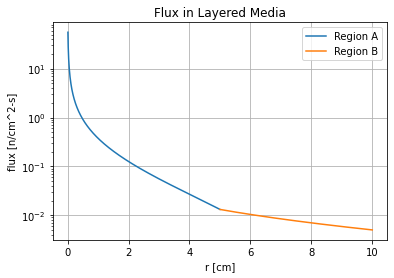

In [12]:
a = 5.0; # cm, radius of boundar between regions
S = 1.0; # n/s, strength of point source


# Region A: Water
D_A = 0.142; # cm, diffusion coefficient for region A 
L_A = 2.54; # cm, diffusion length for region A 

# Region B: Be
D_B = 0.416; # cm, diffusion coefficient for region B
L_B = 18.3; # cm, diffusion length for region B

A = np.ndarray(shape=(3,3),dtype=float);
A[0,0] = 4.0*np.pi*D_A; A[0,1] = 4.0*np.pi*D_A; A[0,2] = 0.0;
A[1,0] = (1./a)*np.exp(a/L_A); A[1,1] = (1./a)*np.exp(-a/L_A); 
A[1,2] = -(1./a)*np.exp(-a/L_B);
A[2,0] = -D_A*(-(1./a**2)*np.exp(a/L_A)+(1./(a*L_A))*np.exp(a/L_A));
A[2,1] = -D_A*(-(1./a**2)*np.exp(-a/L_A)-(1./(a*L_A))*np.exp(-a/L_A));
A[2,2] = D_B*(-(1./a**2)*np.exp(-a/L_B)-(1./(a*L_B))*np.exp(-a/L_B));

rhs = np.ndarray(shape=(3,1),dtype=float);
rhs[0] = S;
rhs[1] = 0; rhs[2] = 0;

C = np.linalg.solve(A,rhs);


def analytic_flux_A(r):
    return (C[0]/r)*np.exp(r/L_A)+(C[1]/r)*np.exp(-r/L_A);

def analytic_flux_B(r):
    return (C[2]/r)*np.exp(-r/L_B);

r_A = np.linspace(1e-2,a,1000);
phi_A = analytic_flux_A(r_A);

r_B = np.linspace(a,2*a,1000);
phi_B = analytic_flux_B(r_B);

plt.semilogy(r_A,phi_A,label='Region A');
plt.semilogy(r_B,phi_B,label='Region B');
plt.grid();
plt.legend();
plt.xlabel('r [cm]');
plt.ylabel('flux [n/cm^2-s]');
plt.title('Flux in Layered Media');
